<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2018-08-31 23:39:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2018-08-31 23:39:20 (13.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Fetching package metadata .............
Solving package specifications: ^C

Traceback (most recent call last):
  File "/opt/conda/envs/DSX-Python35/bin/conda", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/conda/cli/main.py", line 182, in main
    return conda_exception_handler(_main, *args)
  File "/opt/conda/lib/python3.6/site-packages/conda/exceptions.py", line 640, in conda_exception_handler
    return_value = func(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/conda/cli/main.py", line 140, in _main
    exit_code = args.func(args, p)
  File "/opt/conda/lib/python3.6/site-packages/conda/cli/main_install.py", line 80, in execute
    install(args, parser, 'install')
  File "/opt/conda/lib/python3.6/site-packages/conda/cli/install.py", line 261, in install
    channel_priority_map=_channel_priority_map, is_update=isupdate)
  File "/opt/conda/lib/python3.6/site-packages/conda/common/io.py", line 174, in decorated
    return f(*

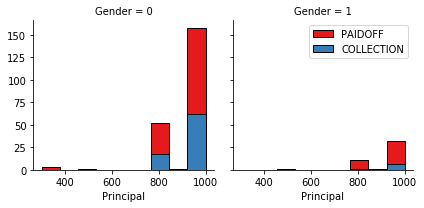

In [19]:
import seaborn as sns

bins=np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

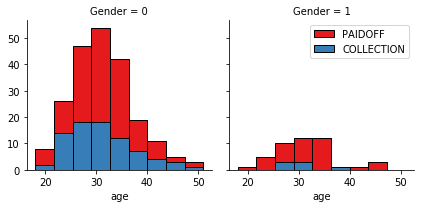

In [20]:
bins=np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

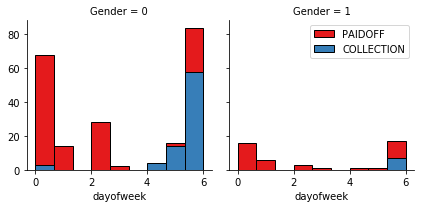

In [21]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [22]:
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [23]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       PAIDOFF        0.731293
        COLLECTION     0.268707
1       PAIDOFF        0.865385
        COLLECTION     0.134615
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [24]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

## One Hot Encoding  
#### How about education?

In [25]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [26]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [27]:
Feature=df[['Principal','terms','age','Gender','dayofweek', 'weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,0,1,0
1,1000,30,33,1,3,0,1,0,0
2,1000,15,27,0,3,0,0,0,1
3,1000,30,28,1,4,1,0,0,1
4,1000,30,29,0,4,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [28]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,0,1,0
1,1000,30,33,1,3,0,1,0,0
2,1000,15,27,0,3,0,0,0,1
3,1000,30,28,1,4,1,0,0,1
4,1000,30,29,0,4,1,0,0,1


What are our lables?

In [29]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [30]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.26122054,
        -1.20577805, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -0.26122054,
        -1.20577805,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -0.26122054,
        -1.20577805, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.12175534,
         0.82934003, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.12175534,
         0.82934003, -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You can find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [31]:
df = pd.read_csv('loan_train.csv')
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df['loan_status'].value_counts()
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature=df[['Principal','terms','age','Gender','dayofweek', 'weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X = Feature
y = df['loan_status'].values
X= preprocessing.StandardScaler().fit(X).transform(X)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,jaccard_similarity_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [46]:
def KTest(X_train, y_train, X_test, y_test, Ks):
    mean_acc = np.zeros((Ks-1))
    f1_score_array = np.zeros((Ks-1))
    jaccard_array = np.zeros((Ks-1))

    std_acc = np.zeros((Ks-1))
    ConfustionMx = [];
    for n in range(1,Ks):
    
      #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
        f1_score_array[n-1] = metrics.f1_score(y_test, yhat, average='weighted')
        jaccard_array[n-1] = metrics.jaccard_similarity_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    plt.plot(range(1,Ks),mean_acc,'g')
    plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Nabors (K)')
    plt.tight_layout()
    plt.show()

    print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
    print( "The best f1_score was with", f1_score_array[mean_acc.argmax()], "with k=", mean_acc.argmax()+1)
    print( "The best jaccard was with", jaccard_array[mean_acc.argmax()], "with k=", mean_acc.argmax()+1)

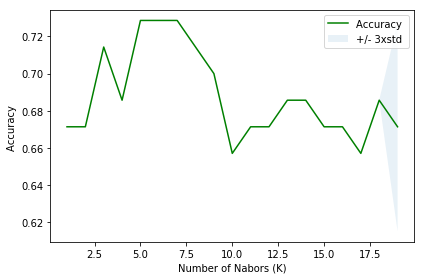

The best accuracy was with 0.728571428571 with k= 5
The best f1_score was with 0.731704223566 with k= 5
The best jaccard was with 0.728571428571 with k= 5


In [47]:
KTest(X_train, y_train, X_test, y_test, 20)

# Decision Tree

In [48]:
df = pd.read_csv('loan_train.csv')
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df['loan_status'].value_counts()
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature=df[['Principal','terms','age','Gender','dayofweek', 'weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X = Feature
y = df['loan_status'].values
X= preprocessing.StandardScaler().fit(X).transform(X)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (311, 9) (311,)
Test set: (35, 9) (35,)


In [53]:
def dtTest(X_train, y_train, X_test, y_test, MDs):
    mean_acc = np.zeros((MDs-1))
    std_acc = np.zeros((MDs-1))
    f1_score_array = np.zeros((MDs-1))
    jaccard_array = np.zeros((MDs-1))
    
    for n in range(3,MDs):
        loanTree = DecisionTreeClassifier(criterion="gini", max_depth = n)
        loanTree.fit(X_train,y_train)
        predTree = loanTree.predict(X_test)
        
        mean_acc[n-1] = metrics.accuracy_score(y_test, predTree)
        f1_score_array[n-1] = metrics.f1_score(y_test, predTree, average='weighted')
        jaccard_array[n-1] = metrics.jaccard_similarity_score(y_test, predTree)
        
    print("Decision Trees's best accuracy was with", mean_acc.max(), "with max_depth=", mean_acc.argmax()+1) 
    print("Decision Trees's f1_score was with", f1_score_array[mean_acc.argmax()], "with max_depth=", mean_acc.argmax()+1)
    print("Decision Trees's jaccard was with", jaccard_array[mean_acc.argmax()], "with max_depth=", mean_acc.argmax()+1)

In [54]:
dtTest(X_train, y_train, X_test, y_test, 20)

Decision Trees's best accuracy was with 0.742857142857 with max_depth= 4
Decision Trees's f1_score was with 0.765760555234 with max_depth= 4
Decision Trees's jaccard was with 0.742857142857 with max_depth= 4


# Support Vector Machine

In [55]:
df = pd.read_csv('loan_train.csv')
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df['loan_status'].value_counts()
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature=df[['Principal','terms','age','Gender','dayofweek', 'weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X = Feature
y = df['loan_status'].values
X= preprocessing.StandardScaler().fit(X).transform(X)

In [56]:
from sklearn.metrics import f1_score,jaccard_similarity_score
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (311, 9) (311,)
Test set: (35, 9) (35,)


In [58]:
def svmTest(X_train, y_train, X_test, y_test):
    clf = svm.SVC(kernel='rbf')
    clf.fit(X_train, y_train)
    yhatSVM = clf.predict(X_test)
    print( "The best f1_score was with", f1_score(y_test, yhatSVM, average='weighted'))
    print( "The best jaccard was with", jaccard_similarity_score(y_test, yhatSVM))

svmTest(X_train, y_train, X_test, y_test)


The best f1_score was with 0.786535303777
The best jaccard was with 0.771428571429


# Logistic Regression

In [59]:
df = pd.read_csv('loan_train.csv')
df.shape
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df['loan_status'].value_counts()
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature=df[['Principal','terms','age','Gender','dayofweek', 'weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X = Feature
y = df['loan_status'].values
X= preprocessing.StandardScaler().fit(X).transform(X)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [61]:
def lrTest(X_train, y_train, X_test, y_test):
    LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    
    print( "The best jaccard was with", jaccard_similarity_score(y_test, yhat))
    print( "The best f1_score was with", f1_score(y_test, yhat, average='weighted'))
    print( "The best log_loss was with", log_loss(y_test, yhat_prob))

In [62]:
lrTest(X_train, y_train, X_test, y_test)

The best jaccard was with 0.628571428571
The best f1_score was with 0.64880952381
The best log_loss was with 0.572877903422


# Model Evaluation using Test set

First, download and load the test set:

In [156]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2018-08-31 21:35:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2018-08-31 21:35:35 (655 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [63]:
df = pd.read_csv('loan_test.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [64]:
df = pd.read_csv('loan_test.csv')
df.shape
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df['loan_status'].value_counts()
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature=df[['Principal','terms','age','Gender','dayofweek', 'weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X = Feature
y = df['loan_status'].values
X= preprocessing.StandardScaler().fit(X).transform(X)

## KNN

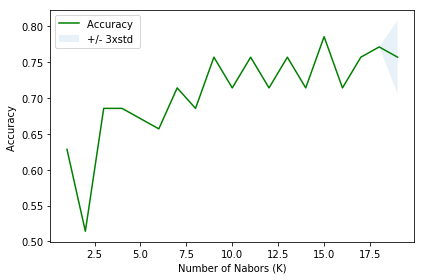

The best accuracy was with 0.785714285714 with k= 15
The best f1_score was with 0.747899159664 with k= 15
The best jaccard was with 0.785714285714 with k= 15


In [66]:
KTest(X, y, X_test, y_test,20)

## Decision Tree

In [67]:
dtTest(X, y, X_test, y_test, 20)

Decision Trees's best accuracy was with 0.757142857143 with max_depth= 8
Decision Trees's f1_score was with 0.714285714286 with max_depth= 8
Decision Trees's jaccard was with 0.757142857143 with max_depth= 8


## SVM

In [68]:
svmTest(X, y, X_test, y_test)

The best f1_score was with 0.727588201272
The best jaccard was with 0.742857142857


## Logistic Regression Test Set

In [69]:
lrTest(X, y, X_test, y_test)

The best jaccard was with 0.728571428571
The best f1_score was with 0.731704223566
The best log_loss was with 0.652061472995


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | .79     | .75      | NA      |
| Decision Tree      | .71     | .76      | NA      |
| SVM                | .73     | .74      | NA      |
| LogisticRegression | .73     | .73      | 0.65    |

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)


<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>